<a href="https://colab.research.google.com/github/AdriVilla/-Unsupervised-Learning/blob/main/USL_Project_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("stock_data.csv") 
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.shape

(340, 15)

In [ ]:
df.head(10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
5,ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.680000,-12.017268,1.516493,10,49,-189000000,1849000000,2.99,6.183946e+08,12.267559,7.496831
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,6.695185e+07,31.040405,129.064585
7,AEE,Ameren Corp,Utilities,MultiUtilities,43.230000,2.174424,1.124186,9,14,287000000,636000000,2.60,2.446154e+08,16.626923,-0.719497
8,AEP,American Electric Power,Utilities,Electric Utilities,58.270000,2.371753,1.068485,11,9,13900000,2052300000,3.13,4.218978e+08,18.456543,-3.022649
9,AFL,AFLAC Inc,Financials,Life & Health Insurance,59.900002,3.027181,1.048295,14,99,-308000000,2533000000,5.88,4.307823e+08,10.187075,-1.883912


In [ ]:
df.describe(include='all')

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340,340,340,340,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
unique,340,340,11,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AAL,American Airlines Group,Industrials,Oil & Gas Exploration & Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,53,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,NaN,NaN,NaN,NaN,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,NaN,NaN,NaN,NaN,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,NaN,NaN,NaN,NaN,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,NaN,NaN,NaN,NaN,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,NaN,NaN,NaN,NaN,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066


* Ticker Symbol: It is an object variable with 340 unique values where all variables have the same frequency of 1.
* Security: It is an object variable with 340 unique values where all variables have the same frequency of 1.
* GICS Sector: It is an object variable with 11 unique values where the most frequent value is Industrials with a frequency of 53.
* GICS Sub Industry: It is an object variable with 104 unique values where the most frequent value is Oil & Gas Exploration & Production with a frequency of 53. 
* Current Price: There are 340 observations with a max value of 1274.94 and min value of 4.500000. Its median value is 59.70 and its mean value is 80.86.
* Price Change: There are 340 observations with a max value of 55.051 and min value of -47.12. Its median value is 4.81 and its mean value is 4.07.
* Volatility: There are 340 observations with a max value of 4.58 and min value of 0.73. Its median value is 1.38 and its mean value is 1.52.
* ROE: There are 340 observations with a max value of 917 and min value of 1. Its median value is 15 and its mean value is 39.59.
* Cash Ratio: There are 340 observations with a max value of 958 and min value of 0. Its median value is 47 and its mean value is 70.02.
* Net Cash Flow: There are 340 observations with a max value of 2.076400e+10 and min value of -1.120800e+10. Its median value is 2.098000e+06 and its mean value is 5.553762e+07.
* Net Income:  There are 340 observations with a max value of 2.444200e+10 and min value of -2.352800e+10. Its median value is 7.073360e+08 and its mean value is 1.494385e+09.
* Earnings Per Share: There are 340 observations with a max value of 50.090 and min value of -61.20. Its median value is 2.895000 and its mean value is 2.77.
* Estimated Shares Outstanding: There are 340 observations with a max value of 6.159292e+09 and min value of 2.767216e+07. Its median value is 3.096751e+08 and its mean value is 5.770283e+08.
* P/E Ratio: There are 340 observations with a max value of 528.03 and min value of 2.93. Its median value is 20.81 and its mean value is 32.612.
* P/B Ratio: There are 340 observations with a max value of 129.06458 and min value of -76.11. Its median value is -1.06 and its mean value is -1.718249.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

* There are no null values.
* There are 4 object features, 7 float features and 4 integer features.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

##### What does the distribution of stock prices look like?

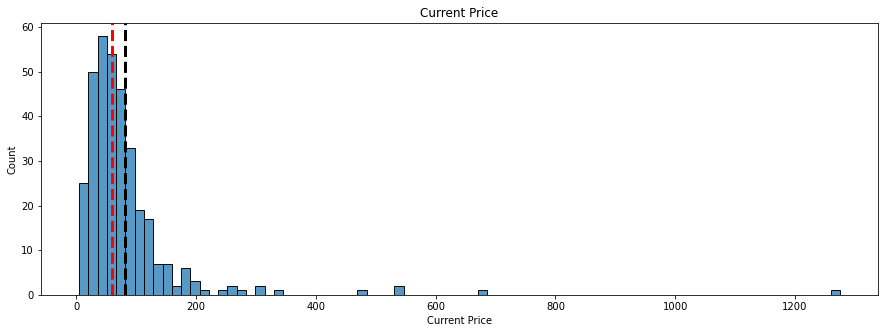

In [ ]:
plt.figure(figsize= (15,5))
sns.histplot(data=df, x= 'Current Price')
plt.axvline(df['Current Price'].mean(), color='black', linestyle='dashed', linewidth=3)
plt.axvline(np.median(df['Current Price']), color='red', linestyle='dashed', linewidth=3)
plt.title('Current Price');

* Current Price distribution is right skewed and with a mean value > median value.
* There is particularly one outlier with a value near to 1300.

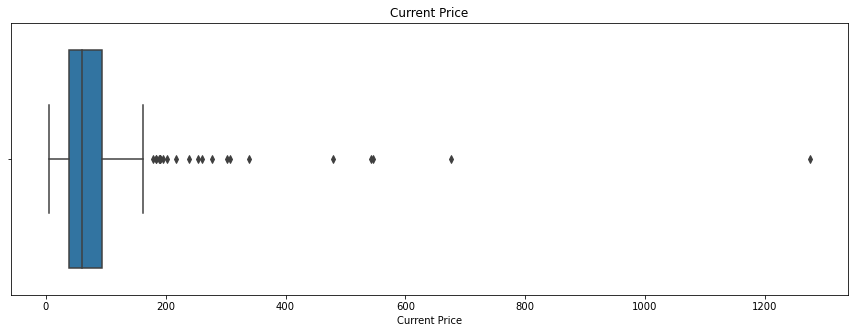

In [ ]:
plt.figure(figsize= (15,5))
sns.boxplot(data=df, x= 'Current Price')
plt.title('Current Price');

#### The stocks of which economic sector have seen the maximum price increase on average?

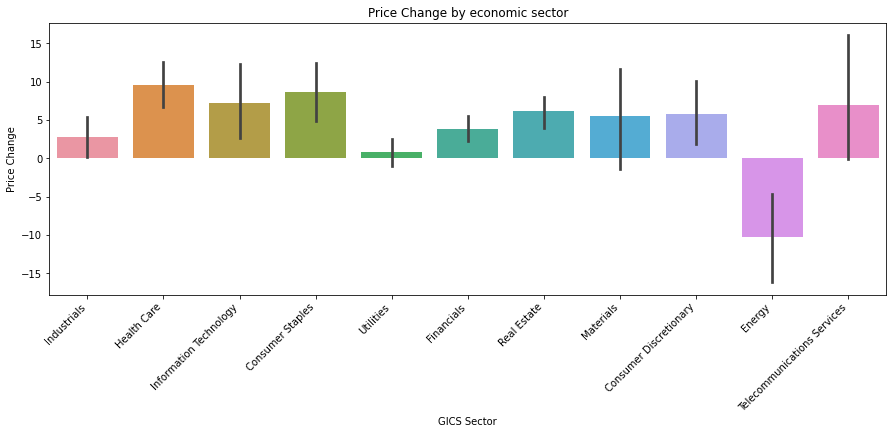

In [ ]:
plt.figure(figsize= (15,5))
sns.barplot(data= df, x= 'GICS Sector', y='Price Change')
plt.xticks(rotation=45, ha='right')
plt.title('Price Change by economic sector');

* Health Care economic sector is the one with the maximum price increase in average. 
* Energy has the maximum price decrease in average with a considerable variability.
* Highest variability is in Telecommunications Services.
* Smallest variabilities are in Financials and Utilities. 

#### How are the different variables correlated with each other?

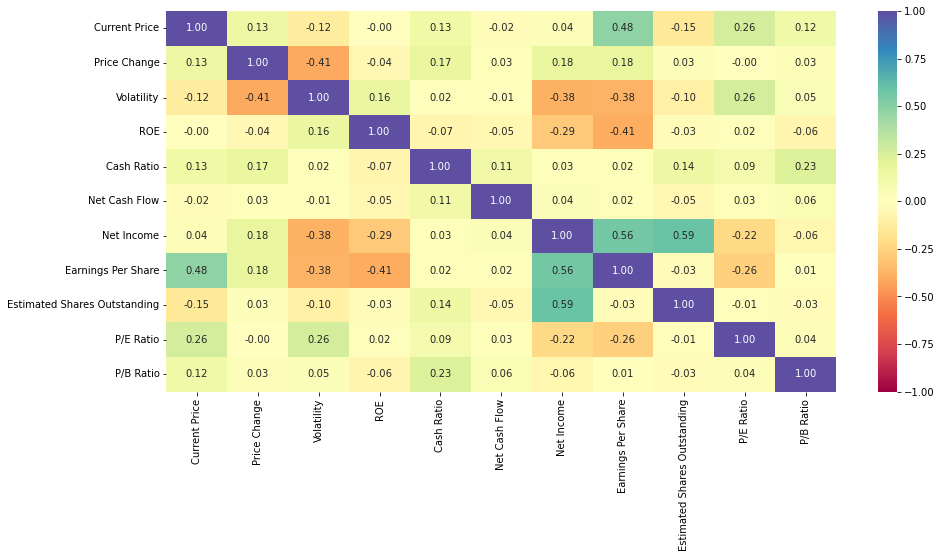

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no important correlation between variables.

##### Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

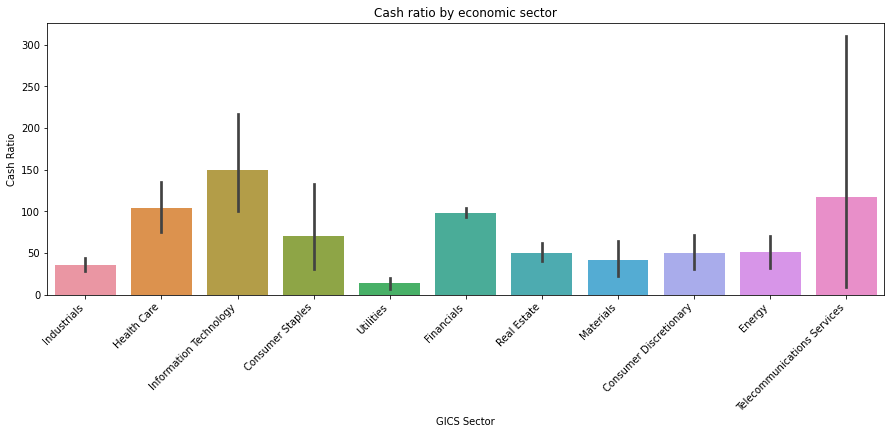

In [ ]:
plt.figure(figsize= (15,5))
sns.barplot(data= df, x= 'GICS Sector', y='Cash Ratio')
plt.xticks(rotation=45, ha='right')
plt.title('Cash ratio by economic sector');

* Information and Technology is the economic sector with the highest average cash ratio followed by Health Care.
* Telecommunications Services has the highest variability while Financials has the lowest.
* Utilities has the lowest average cash ratio followed by Industrials.

##### P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

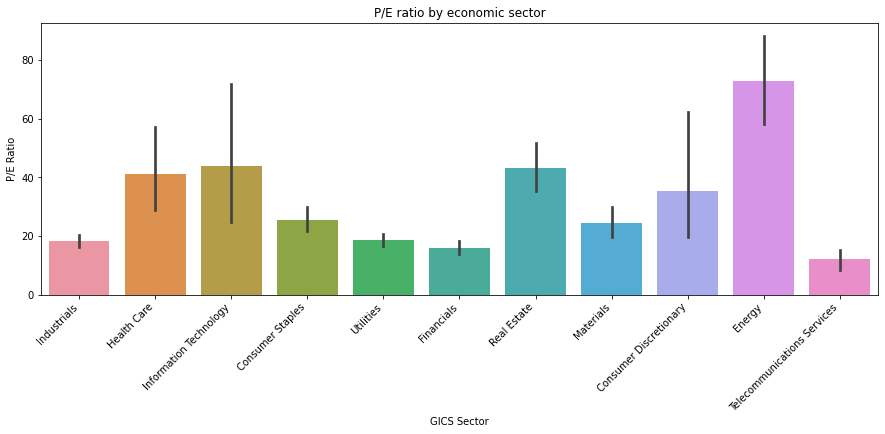

In [ ]:
plt.figure(figsize= (15,5))
sns.barplot(data= df, x= 'GICS Sector', y='P/E Ratio')
plt.xticks(rotation=45, ha='right')
plt.title('P/E ratio by economic sector');

* Energy sector has the highest P/E ratio, which means that is it probably overvalued. 
* Information Technology and Consumer Discretionary have the highest variabilities.

## EDA

- It is a good idea to explore the data once again after manipulating it.

#### Univariate analysis

In [ ]:
df.select_dtypes(include=np.number).columns.tolist()

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [ ]:
## Outlier check
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
numeric_var = df.select_dtypes(include=np.number).columns.tolist()

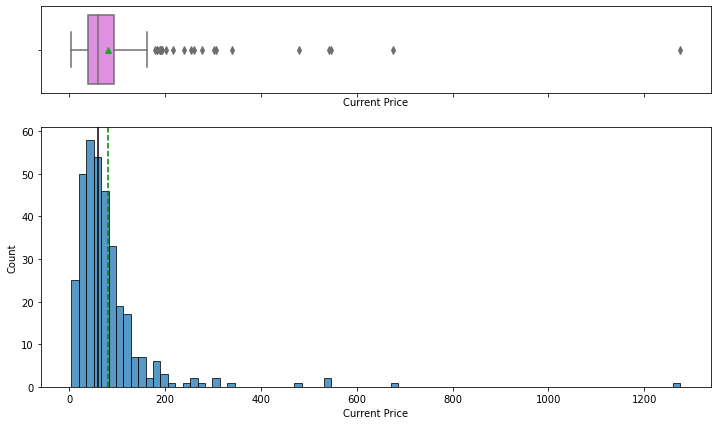

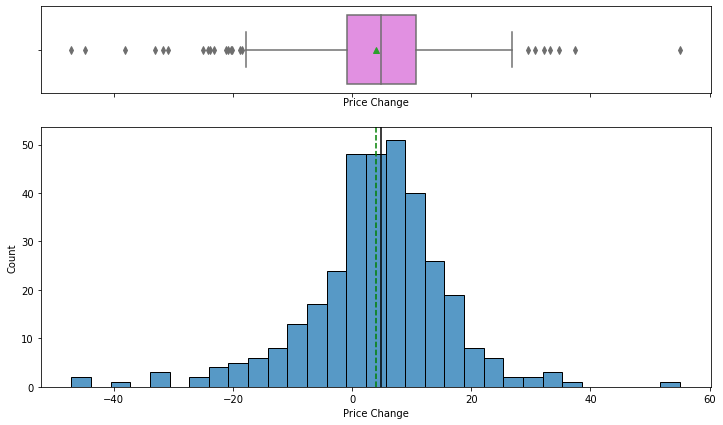

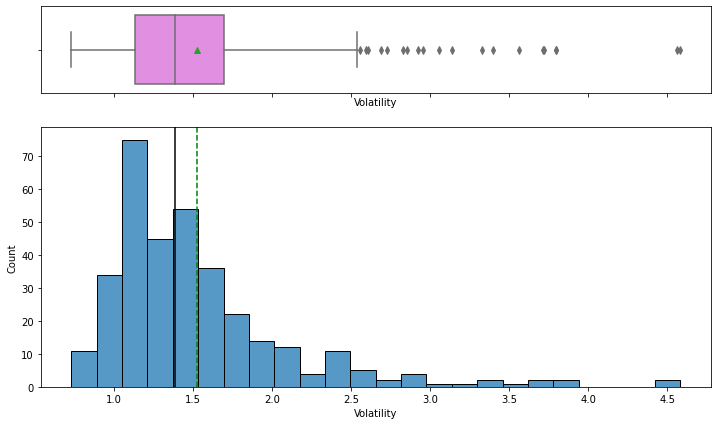

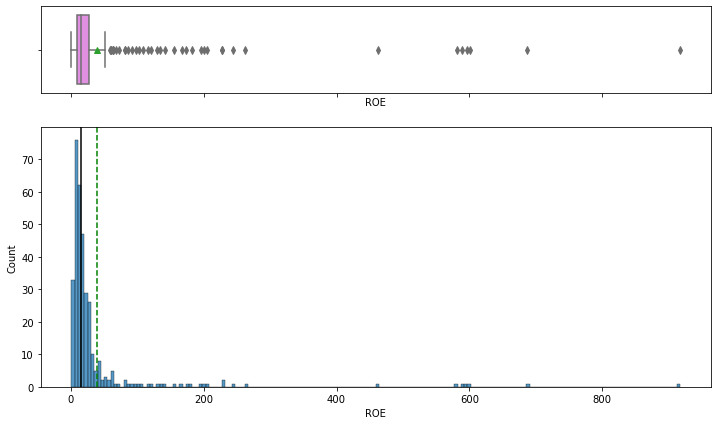

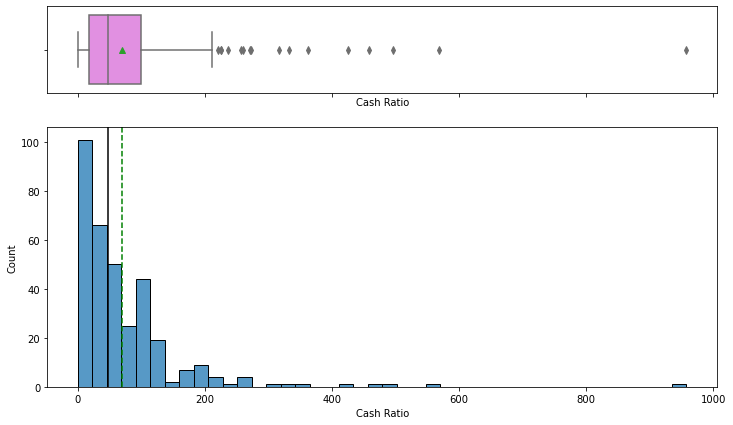

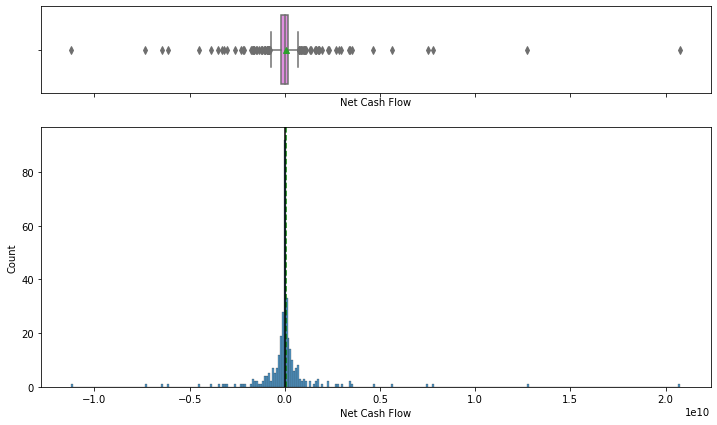

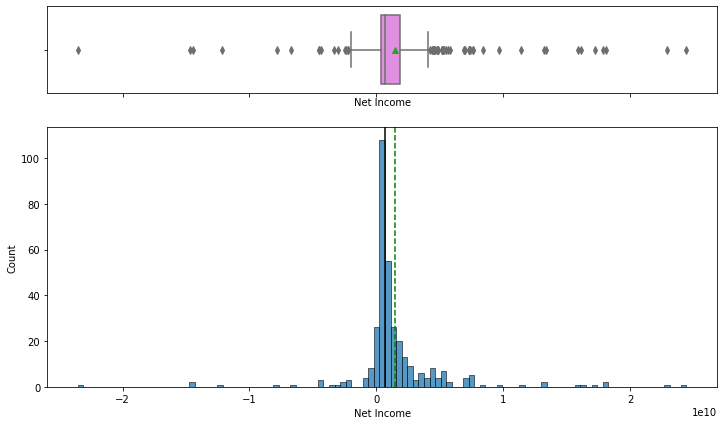

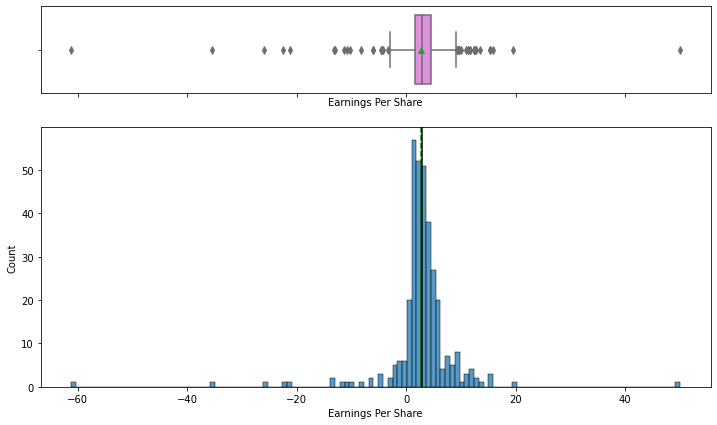

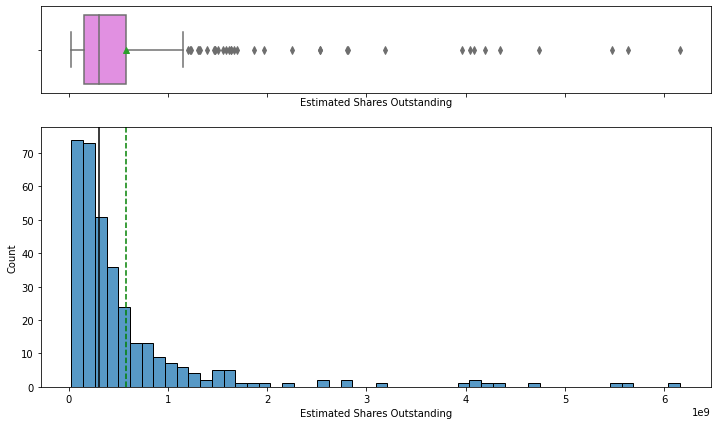

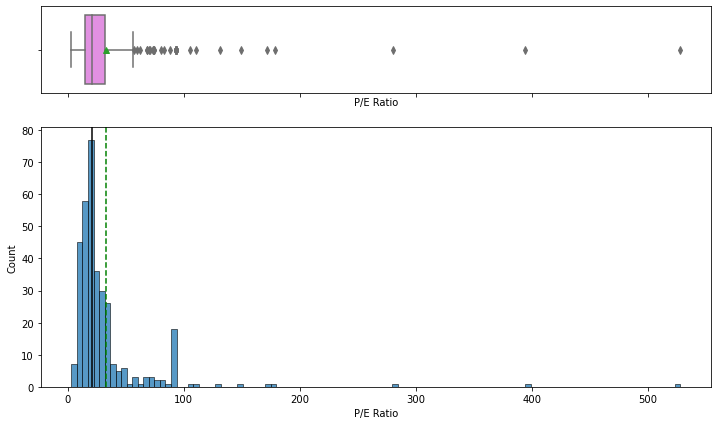

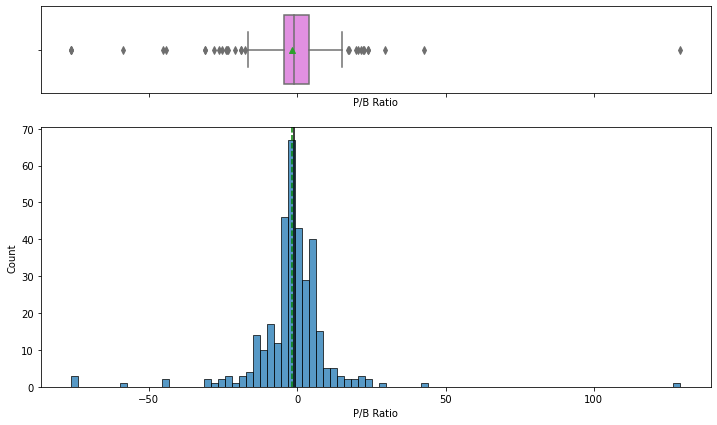

In [ ]:
for feature in numeric_var:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None) 

• 'Current Price': Is skewed to the right and has outliers. They will be treated as real values.

• 'Price Change': It is a normal distribution with negative and positive outliers. Outliers will be treated as real values

• 'Volatility': It is right skewed and contains outliers. Outliers will be treated as real values.

• 'ROE': it is skewed to the right and has considerable high outliers, however, these will be taken as real values.

• 'Cash Ratio': It is skewed to the right and has an outlier with a value near to 1000. It will be taken as a real value.

• 'Net Cash Flow': It has a tight normal distribution. Outliers will be treated as real values.

• 'Net Income': It is a right skewed distribution. Outliers will be treated as real values.

• 'Earnings Per Share': It is a normal distribution with outliers that will be treated as real values.

• 'Estimated Shares Outstanding': Right skewed. The mean is having the same value as the 75% value of the boxplot.

• 'P/E Ratio': Right skewed.

• 'P/B Ratio': It has a normal distribution with an outlier value above 100 and bellow -50.


#### Bivariate analysis

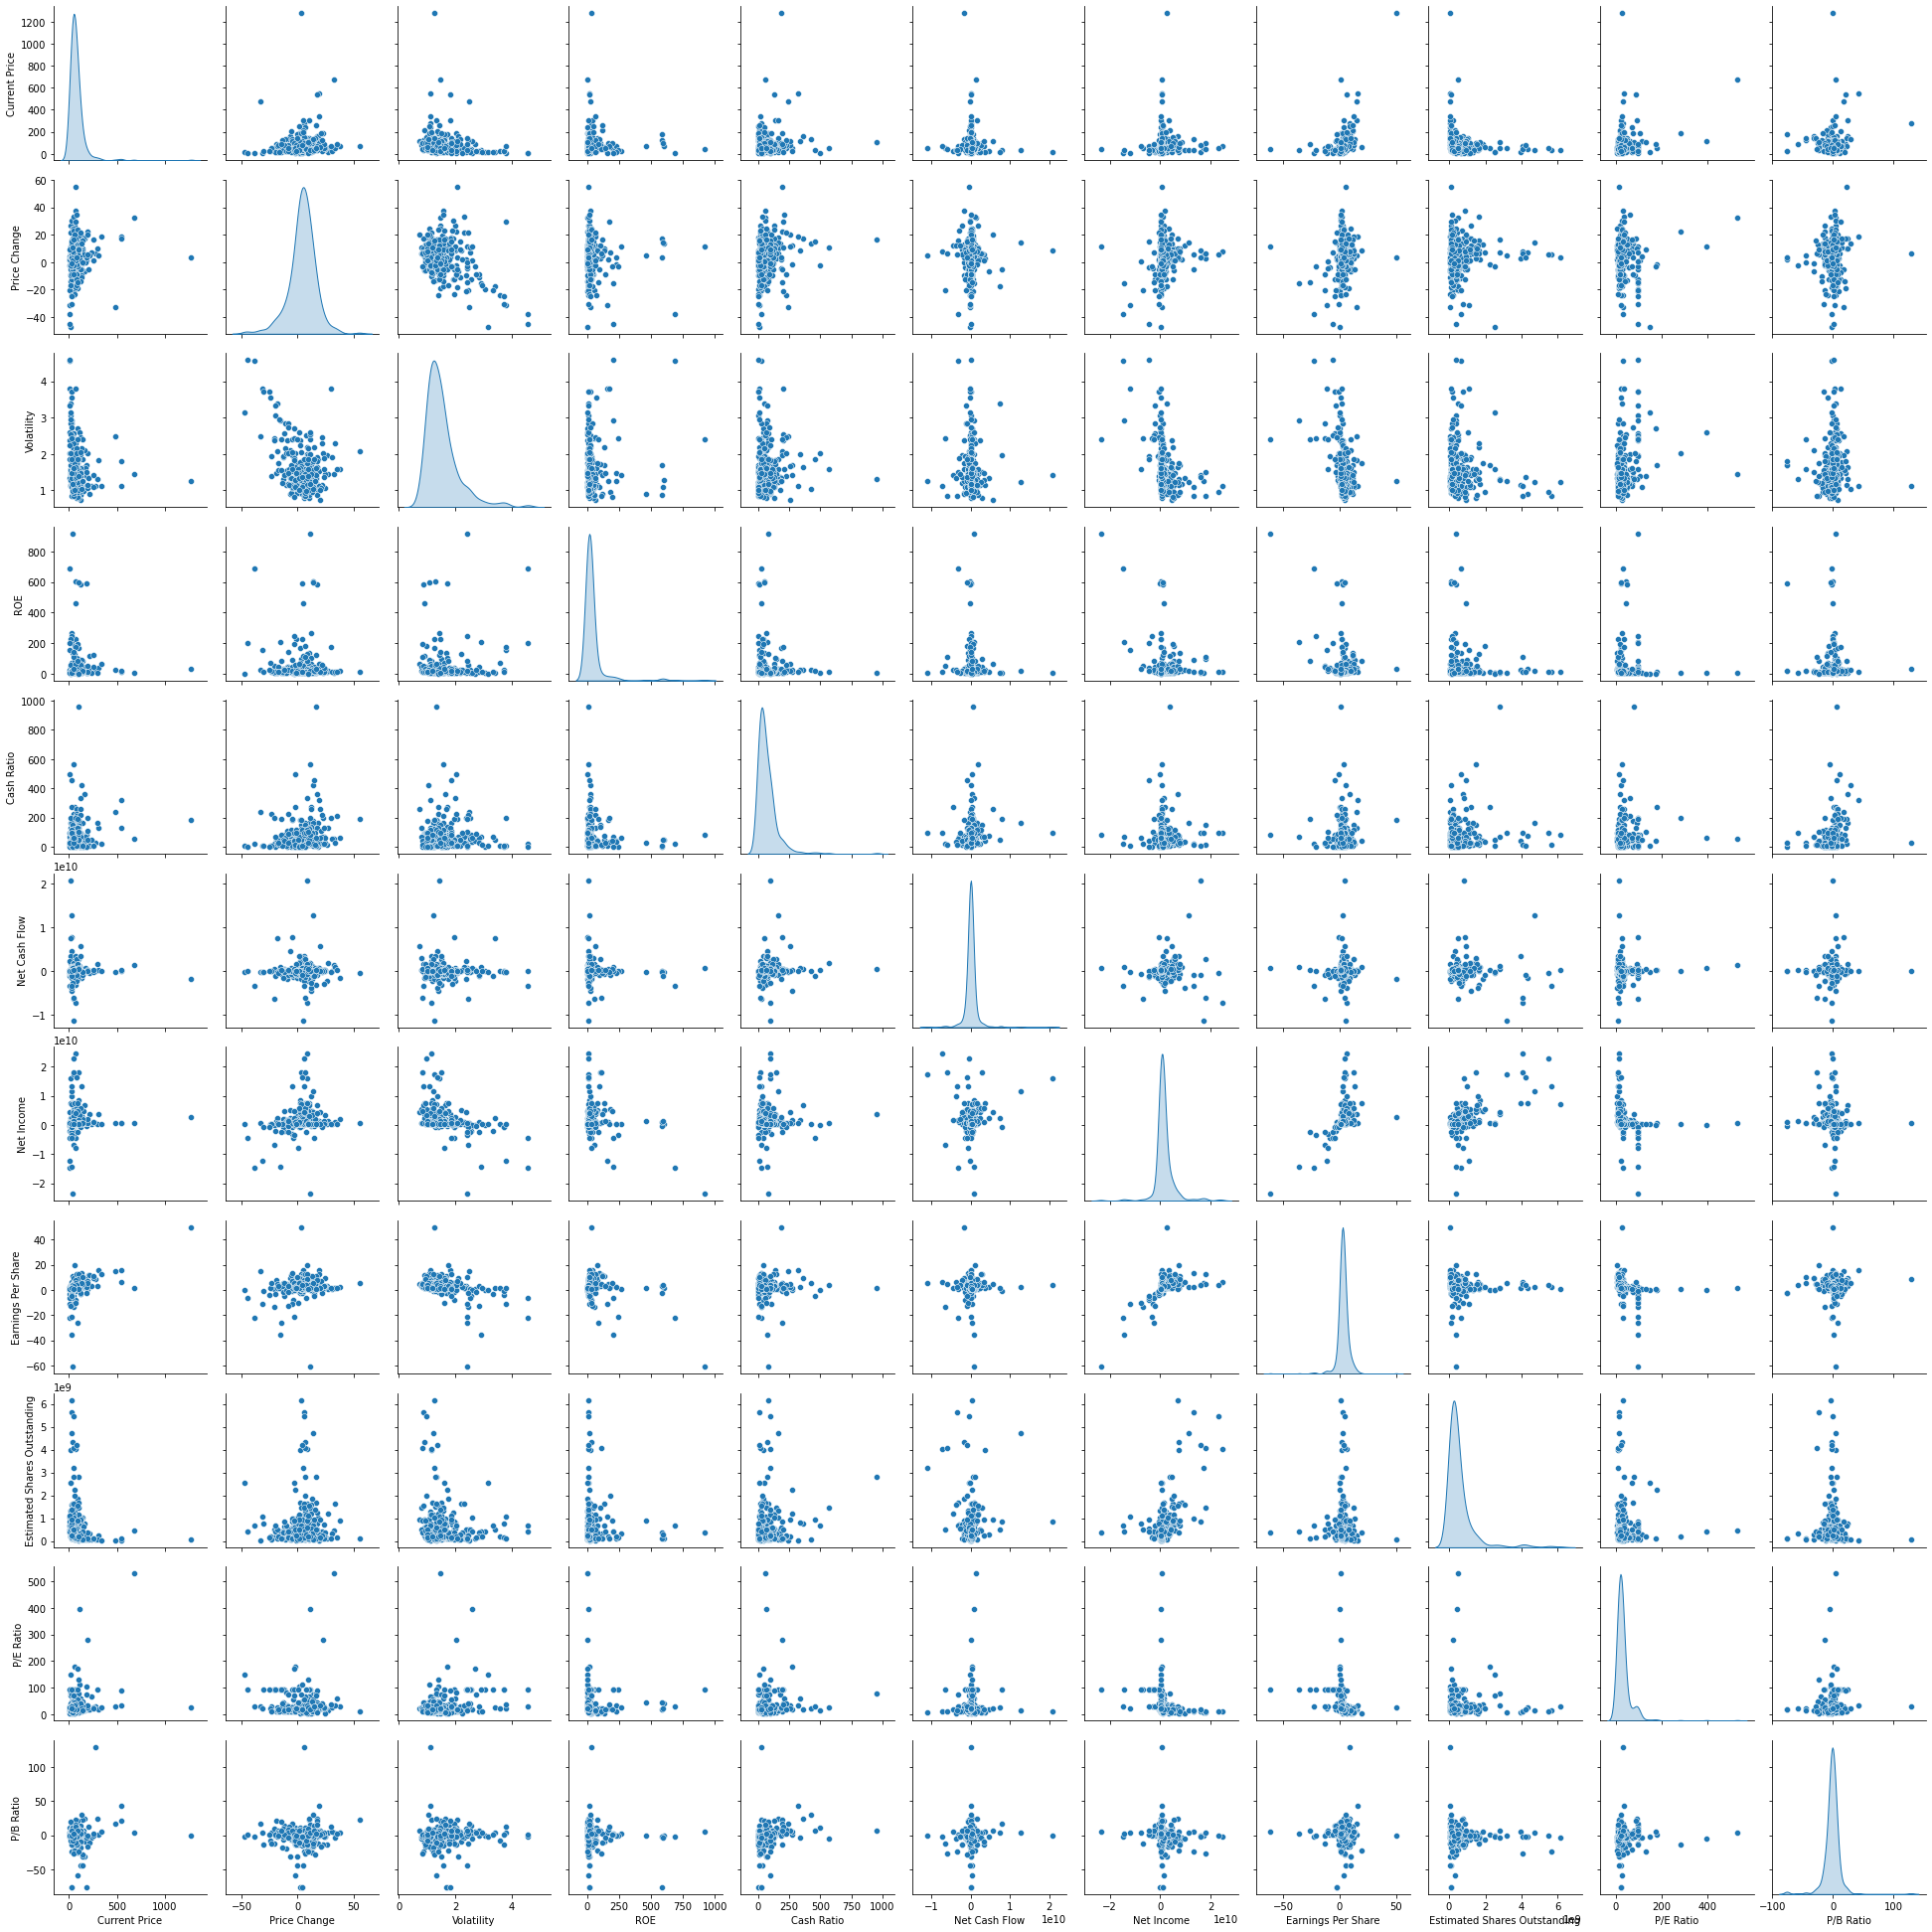

In [ ]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

* There seems to be no positive nor negative correlation between variables, just an increase or decrease in the same axis value such as with net income and P/B ratio or Estimated Shares Outstanding and P/B ratio.
* Other variables such as net cashflow and net income seem to have no pattern at all (no correlation).
* Variability and price change are the only ones that have a slight negative correlation.

* P/E ratio, Estimated Shares Outstanding has two modes. 


## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [ ]:
# Looking for duplicated values
df.duplicated().sum()

0

* There are no duplicated observations.

In [ ]:
# Missing value treatment
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

* No missing values

#### Treating Misssing values:

1. Dropping outliers

In [ ]:
df_dropOutliers = df.copy()

In [ ]:
df_dropOutliers["Current Price"].max()

1274.949951

In [ ]:
df_dropOutliers["Current Price"].median()

59.705

In [ ]:
df_dropOutliers[df_dropOutliers['Current Price'].between(400,1274.949951)].shape[0]

5

In [ ]:
df_dropOutliers["Volatility"].max()

4.58004173

In [ ]:
df_dropOutliers["Volatility"].median()

1.3855929255000001

In [ ]:
df_dropOutliers[df_dropOutliers['Volatility'].between(4,4.58004173)].shape[0]

2

In [ ]:
df_dropOutliers["ROE"].max()

917

In [ ]:
df_dropOutliers["ROE"].median()

15.0

In [ ]:
df_dropOutliers[df_dropOutliers['ROE'].between(400,917)].shape[0]

7

In [ ]:
df_dropOutliers["Net Cash Flow"].max()

20764000000

In [ ]:
df_dropOutliers["Net Cash Flow"].min()

-11208000000

In [ ]:
df_dropOutliers["Net Cash Flow"].median()

2098000.0

In [ ]:
df_dropOutliers[df_dropOutliers['Net Cash Flow'].between(-11208000000,-10000000000)].shape[0]

1

In [ ]:
df_dropOutliers[df_dropOutliers['Net Cash Flow'].between(10000000000,20764000000)].shape[0]

2

In [ ]:
df_dropOutliers["Earnings Per Share"].max()

50.09

In [ ]:
df_dropOutliers["Earnings Per Share"].min()

-61.2

In [ ]:
df_dropOutliers["Earnings Per Share"].median()

2.895

In [ ]:
df_dropOutliers[df_dropOutliers['Earnings Per Share'].between(-61.2,-2)].shape[0]

22

In [ ]:
df_dropOutliers[df_dropOutliers['Earnings Per Share'].between(2,50)].shape[0]

221

In [ ]:
df_dropOutliers["P/E Ratio"].max()

528.0390742

In [ ]:
df_dropOutliers["P/E Ratio"].median()

20.81987609

In [ ]:
df_dropOutliers[df_dropOutliers['P/E Ratio'].between(300,528.0390742)].shape[0]

2

In [ ]:
df_dropOutliers["P/B Ratio"].max()

129.0645854

In [ ]:
df_dropOutliers["P/B Ratio"].min()

-76.11907749

In [ ]:
df_dropOutliers["P/B Ratio"].median()

-1.0671703205

In [ ]:
df_dropOutliers[df_dropOutliers['P/B Ratio'].between(50,129.0645854)].shape[0]

1

In [ ]:
df_dropOutliers[df_dropOutliers['P/B Ratio'].between(-76.11907749,-50)].shape[0]

4

In [ ]:
df_dropOutliers['P/E Ratio'].mask(df_dropOutliers['P/E Ratio'] >= 50 ,-1.0671703205, inplace=True)

In [ ]:
df_dropOutliers['P/E Ratio'].mask(df_dropOutliers['P/E Ratio'] <= -50 ,-1.0671703205, inplace=True)

In [ ]:
indexAge = df_dropOutliers[(df_dropOutliers['Current Price'] >= 400)|(df_dropOutliers['Volatility'] >= 4)|
              (df_dropOutliers['ROE'] >= 400)|(df_dropOutliers['Net Cash Flow'] <= -10000000000)|
              (df_dropOutliers['Net Cash Flow'] >= 10000000000 )|(df_dropOutliers['P/E Ratio']>= 300)|
              (df_dropOutliers['P/B Ratio'] >= 50)|(df_dropOutliers['P/B Ratio']<= -50)].index
df_dropOutliers.drop(indexAge , inplace=True)

2. Treating oultiers with the median

In [ ]:
df_treatOutliers = df.copy()

In [ ]:
df_treatOutliers['Current Price'].mask(df_treatOutliers['Current Price'] >= 400 ,59.705, inplace=True)

In [ ]:
df_treatOutliers['Volatility'].mask(df_treatOutliers['Volatility'] >= 4 ,1.3855929255000001, inplace=True)

In [ ]:
df_treatOutliers['ROE'].mask(df_treatOutliers['ROE'] >= 400 ,15, inplace=True)

In [ ]:
df_treatOutliers['Net Cash Flow'].mask(df_treatOutliers['Net Cash Flow'] <= -10000000000 ,2098000, inplace=True)

In [ ]:
df_treatOutliers['Net Cash Flow'].mask(df_treatOutliers['Net Cash Flow'] >= 10000000000 ,2098000, inplace=True)

In [ ]:
df_treatOutliers['P/E Ratio'].mask(df_treatOutliers['P/E Ratio'] >= 300 ,20.81987609, inplace=True)

In [ ]:
df_treatOutliers['P/E Ratio'].mask(df_treatOutliers['P/E Ratio'] >= 50 ,-1.0671703205, inplace=True)

In [ ]:
df_treatOutliers['P/E Ratio'].mask(df_treatOutliers['P/E Ratio'] <= -50 ,-1.0671703205, inplace=True)

In [ ]:
# Scaling data without treating outliers
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df1 = df[numeric_var].copy()
df_scaled = scaler.fit_transform(df1)
df_scaled = pd.DataFrame(df_scaled, columns=df1.columns)

In [ ]:
df_scaled.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


In [ ]:
# Scaling data that was treated droping outliers
scaler = StandardScaler()
df_dropOutliers1 = df_dropOutliers[numeric_var].copy()
df_dropOutliers_scaled = scaler.fit_transform(df_dropOutliers1)
df_dropOutliers_scaled = pd.DataFrame(df_dropOutliers_scaled, columns=df_dropOutliers1.columns)

In [ ]:
df_dropOutliers_scaled.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.587131,0.512972,0.320939,2.769361,-0.199635,-0.462036,1.766587,1.798186,0.117558,-1.303656,-0.795043
1,-0.245978,0.367224,1.250795,2.641169,0.087134,0.038060,1.048407,0.059634,1.292778,0.067257,-0.791271
2,-0.535423,0.627172,-0.431896,-0.153431,-0.023162,0.715289,0.838428,0.015326,1.136152,-0.253555,0.131608
3,0.454909,0.862052,-0.278904,-0.461093,1.223179,-0.184762,-0.266349,-0.339136,-0.087656,-1.738452,0.638980
4,-0.325156,-0.525163,0.346460,-0.332900,2.237900,0.239717,-0.246741,-0.539575,2.041813,-1.738452,0.292195


In [ ]:
# Scaling data that was treated outliers with median
scaler = StandardScaler()
df_treatOutliers1 = df[numeric_var].copy()
df_treatOutliers_scaled = scaler.fit_transform(df_treatOutliers1)
df_treatOutliers_scaled = pd.DataFrame(df_treatOutliers_scaled, columns=df_treatOutliers1.columns)

In [ ]:
df_treatOutliers_scaled.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


## K-means Clustering

In [ ]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.3832204631808573
Number of Clusters: 3 	Average Distortion: 2.2659465936501304
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.136956991578069
Number of Clusters: 6 	Average Distortion: 2.069402881418923
Number of Clusters: 7 	Average Distortion: 2.031429078911334
Number of Clusters: 8 	Average Distortion: 1.9772319620452397


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

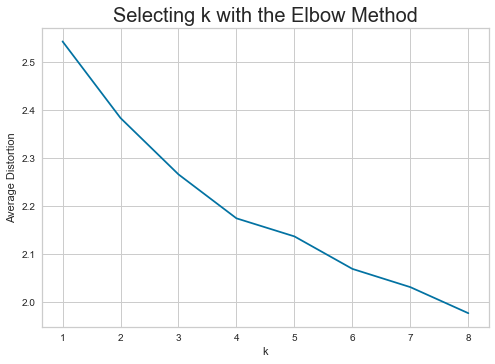

In [ ]:
# Average distortion by number of clusters with eucledian distance where outliers were not treated
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction = model.predict(df_scaled)
    distortion = (
        sum(
            np.min(cdist(df_scaled, model.cluster_centers_, "euclidean"), axis=1)
        )
        / df_scaled.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

* For non treated data elbow seems to be between 4 - 6 clusters.

Number of Clusters: 1 	Average Distortion: 2.841044710628958
Number of Clusters: 2 	Average Distortion: 2.693022920812875
Number of Clusters: 3 	Average Distortion: 2.5799671315270714
Number of Clusters: 4 	Average Distortion: 2.4592291398252972
Number of Clusters: 5 	Average Distortion: 2.3842065407040405
Number of Clusters: 6 	Average Distortion: 2.333482246013868
Number of Clusters: 7 	Average Distortion: 2.208399064022699
Number of Clusters: 8 	Average Distortion: 2.157668852678597


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

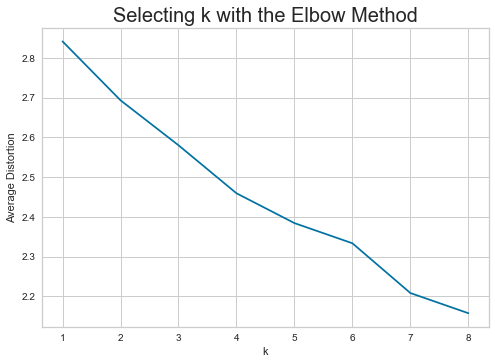

In [ ]:
# Average distortion by number of clusters with eucledian distance where outliers were dropped
clusters = range(1, 9)
meanDistortions_drop = []

for k in clusters:
    model_drop = KMeans(n_clusters=k)
    model_drop.fit(df_dropOutliers_scaled)
    prediction_drop = model_drop.predict(df_dropOutliers_scaled)
    distortion_drop = (
        sum(
            np.min(cdist(df_dropOutliers_scaled, model_drop.cluster_centers_, "euclidean"), axis=1)
        )
        / df_dropOutliers_scaled.shape[0]
    )

    meanDistortions_drop.append(distortion_drop)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion_drop)

plt.plot(clusters, meanDistortions_drop, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

* For data treated by dropping outliers Elbow graphs looks linear and there is no clear inflection point.

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.175554082632614
Number of Clusters: 5 	Average Distortion: 2.1059351899972185
Number of Clusters: 6 	Average Distortion: 2.074356704947458
Number of Clusters: 7 	Average Distortion: 2.021729795203991
Number of Clusters: 8 	Average Distortion: 1.9871317380483406


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

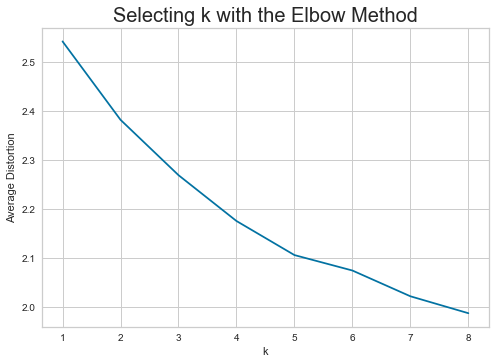

In [ ]:
# Average distortion by number of clusters with eucledian distance where outliers were treated with the median
clusters = range(1, 9)
meanDistortions_med = []

for k in clusters:
    model_med = KMeans(n_clusters=k)
    model_med.fit(df_treatOutliers_scaled)
    prediction_med = model_med.predict(df_treatOutliers_scaled)
    distortion_med = (
        sum(
            np.min(cdist(df_treatOutliers_scaled, model_med.cluster_centers_, "euclidean"), axis=1)
        )
        / df_treatOutliers_scaled.shape[0]
    )

    meanDistortions_med.append(distortion_med)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion_med)

plt.plot(clusters, meanDistortions_med, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

* For data treated with the median the elbow seems to be at 4.

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.45797710447228496
For n_clusters = 4, silhouette score is 0.4495910932182279
For n_clusters = 5, silhouette score is 0.43136860491040785
For n_clusters = 6, silhouette score is 0.41692317648722865
For n_clusters = 7, silhouette score is 0.42734615370238255
For n_clusters = 8, silhouette score is 0.40059669298879463
For n_clusters = 9, silhouette score is 0.36526595518958394


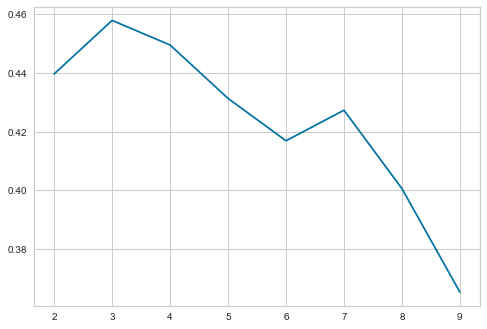

In [ ]:
# Average distortion by number of clusters with eucledian distance where outliers were not treated

sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((df_scaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(df_scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

* Highest silhouette scores are at clusters 3 and 4.

For n_clusters = 2, silhouette score is 0.34128044222283815
For n_clusters = 3, silhouette score is 0.35458904674298325
For n_clusters = 4, silhouette score is 0.1741096432177735
For n_clusters = 5, silhouette score is 0.18332867985455265
For n_clusters = 6, silhouette score is 0.22166723156158868
For n_clusters = 7, silhouette score is 0.182468728814705
For n_clusters = 8, silhouette score is 0.12391507792937295
For n_clusters = 9, silhouette score is 0.13904625551767605


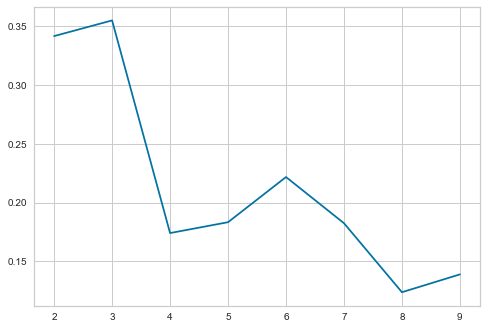

In [ ]:
# Average distortion by number of clusters with eucledian distance where outliers were droped

sil_score_drop = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer_drop = KMeans(n_clusters=n_clusters)
    preds_drop = clusterer_drop.fit_predict((df_dropOutliers_scaled))
    # centers = clusterer.cluster_centers_
    score_drop = silhouette_score(df_dropOutliers_scaled, preds_drop)
    sil_score_drop.append(score_drop)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score_drop))

plt.plot(cluster_list, sil_score_drop)

* Data treated by dropping outliers will no more be considered. Silhouette score are lower than silhouette scores from data treated with median and non-treated data. Clusters 6-9 scores are close to 0.

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.45547866229080475
For n_clusters = 4, silhouette score is 0.4495910932182279
For n_clusters = 5, silhouette score is 0.4246100327076667
For n_clusters = 6, silhouette score is 0.41619276995296256
For n_clusters = 7, silhouette score is 0.3980315597381588
For n_clusters = 8, silhouette score is 0.4044473835035126
For n_clusters = 9, silhouette score is 0.40903368582842603


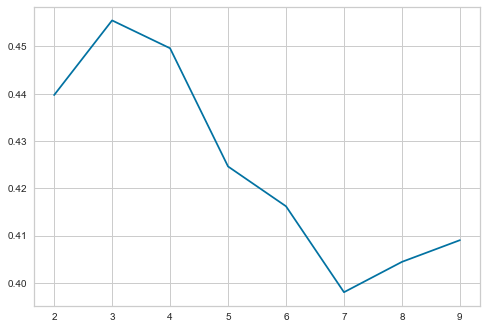

In [ ]:
# Average distortion by number of clusters with eucledian distance where outliers were treated with the median

sil_score_med = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer_med = KMeans(n_clusters=n_clusters)
    preds_med = clusterer_med.fit_predict((df_treatOutliers_scaled))
    # centers = clusterer.cluster_centers_
    score_med = silhouette_score(df_treatOutliers_scaled, preds_med)
    sil_score_med.append(score_med)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score_med))

plt.plot(cluster_list, sil_score_med)

* Highest silhouette scores are at clusters 3 and 4.

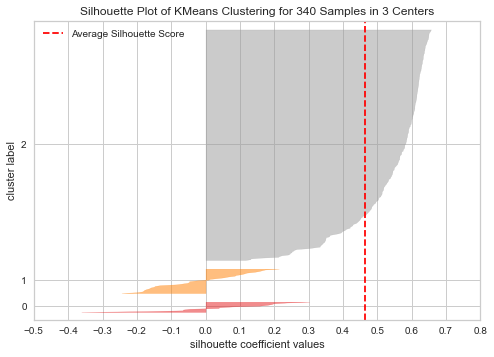

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients non treated data
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

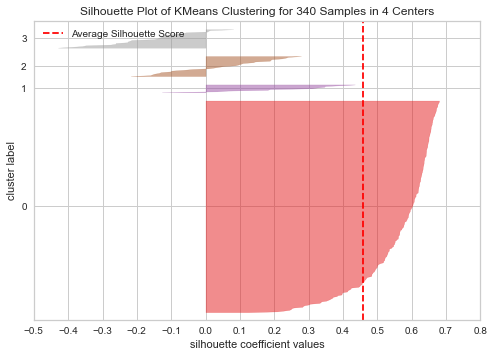

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients non treated data
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

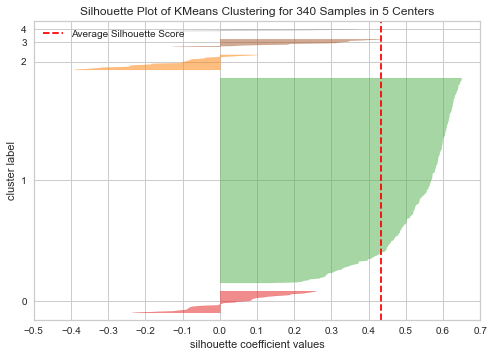

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients non treated data
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

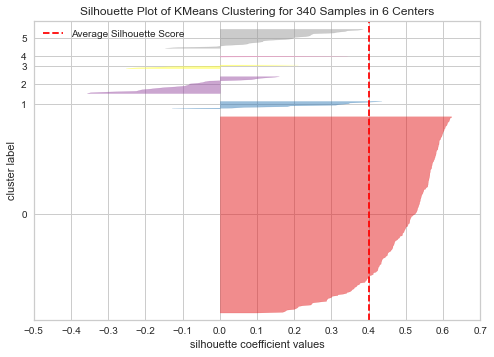

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients non treated data
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

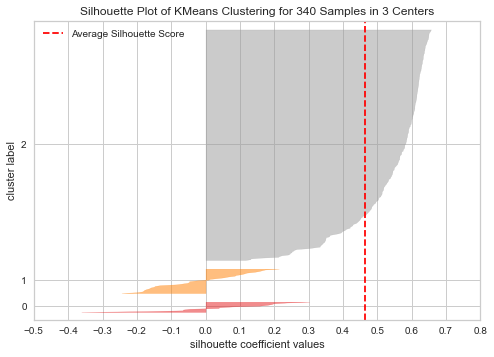

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients treated data with median
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(df_treatOutliers_scaled)
visualizer.show()

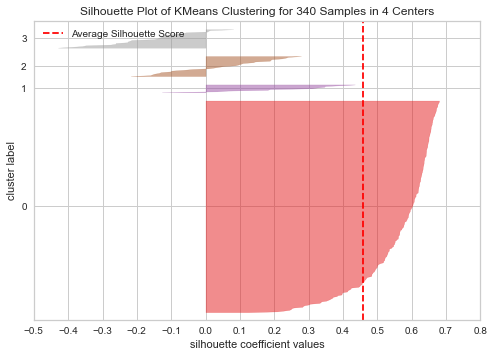

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients treated data with median
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(df_treatOutliers_scaled)
visualizer.show()

* Non treated data with 6 clusters is the best model.

#### Final model

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(df_scaled)

KMeans(n_clusters=6, random_state=0)

In [ ]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

In [ ]:
# adding kmeans cluster labels to the scaled dataframe

df_scaled["K_means_segments"] = kmeans.labels_

#### Cluster profiling

In [ ]:
cluster_profile = df.groupby("K_means_segments").mean()

In [ ]:
cluster_profile_scaled = df_scaled.groupby("K_means_segments").mean()

In [ ]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Cash Ratio"].count().values
)

In [ ]:
cluster_profile_scaled["count_in_each_segment"] = (
    df_scaled.groupby("K_means_segments")["Cash Ratio"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,72.633251,5.118334,1.383473,34.800000,52.905455,-14092741.818182,1473201570.909091,3.631473,430196050.060400,23.859540,-3.389063,275
1,44.470001,11.397804,2.405408,917.000000,80.000000,698000000.000000,-23528000000.000000,-61.200000,384444444.400000,93.089287,4.970809,1
2,48.103077,6.053507,1.163964,27.538462,77.230769,773230769.230769,14114923076.923077,3.958462,3918734987.169230,16.098039,-4.253404,13
3,34.516154,-17.260440,2.938570,76.076923,48.769231,-261407346.153846,-3098292307.692307,-7.388077,481614743.486154,75.734798,1.646607,26
4,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
5,225.945603,12.362269,1.743078,28.545455,299.500000,759552909.090909,1031240545.454545,6.590455,587974943.437273,47.839183,16.875739,22


* Cluster 1 has the highest ROE and has only 1 observation.
* CLuster 2 has the observations with the highest Net Cash Flows, Net Incomes and Estimated Shares Outstanding.
* Cluster 3 has the highest volatility.
* Cluster 4 has the highest Current Prices and Prices Change and has only 3 observations.
* Cluster 5 has the highest Cash Ratio and Earnings per Share.
* Cluster 0 has the thick of the observations and has no max mean values in any of the features.

In [ ]:
# let's display cluster profiles
cluster_profile_scaled.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,-0.084047,0.086760,-0.241151,-0.049759,-0.189594,-0.035827,-0.005384,0.129948,-0.173847,-0.197659,-0.119803,275
1,-0.371689,0.610544,1.488223,9.101176,0.110496,0.330570,-6.359977,-9.725729,-0.228017,1.365673,0.479628,1
2,-0.334583,0.164765,-0.612617,-0.125082,0.079825,0.369279,3.207781,0.179657,3.956533,-0.372928,-0.181779,13
3,-0.473351,-1.779900,2.390470,0.378400,-0.235405,-0.163079,-1.167328,-1.545243,-0.112968,0.973777,0.241271,26
4,2.513965,1.488004,0.852517,-0.369243,0.398462,0.330693,-0.306744,-0.308093,-0.248951,8.318604,-0.258428,3
5,1.481790,0.690992,0.367392,-0.114637,2.541598,0.362241,-0.117718,0.579773,0.012961,0.343844,1.333251,22


In [ ]:
# economic industries of each cluster
for cl in df["K_means_segments"].unique():
    print("In cluster {}, the following industries are present:".format(cl))
    print(df[df["K_means_segments"] == cl]["GICS Sector"].unique())
    print()

In cluster 0, the following industries are present:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Telecommunications Services' 'Energy']

In cluster 5, the following industries are present:
['Information Technology' 'Health Care' 'Consumer Discretionary'
 'Real Estate' 'Telecommunications Services' 'Energy' 'Consumer Staples']

In cluster 4, the following industries are present:
['Health Care' 'Consumer Discretionary' 'Information Technology']

In cluster 1, the following industries are present:
['Energy']

In cluster 3, the following industries are present:
['Energy' 'Materials' 'Information Technology' 'Industrials']

In cluster 2, the following industries are present:
['Financials' 'Consumer Discretionary' 'Health Care'
 'Information Technology' 'Consumer Staples' 'Telecommunications Services'
 'Energy']



* Energy economic sector is present in all of the cluster. In EDA Energy had a high variability in Cash Ratio and P/E ratio and other features. This would be an explanation for it to be in all clusters. 
* Cluster 1 is made up obly by companies related to energy. It is the smallest cluster.
* Cluster 0 has the thick of all the other observations with 275 of the observations.

In [ ]:
# let's see the economic subindustries of each cluster
for cl in df["K_means_segments"].unique():
    print("In cluster {}, the following subindustries are present:".format(cl))
    print(df[df["K_means_segments"] == cl]["GICS Sub Industry"].unique())
    print()

In cluster 0, the following subindustries are present:
['Airlines' 'Pharmaceuticals' 'Health Care Equipment'
 'Application Software' 'Agricultural Products' 'MultiUtilities'
 'Electric Utilities' 'Life & Health Insurance'
 'Property & Casualty Insurance' 'REITs' 'Multi-line Insurance'
 'Insurance Brokers' 'Internet Software & Services' 'Specialty Chemicals'
 'Building Products' 'Semiconductor Equipment'
 'Electrical Components & Equipment' 'Asset Management & Custody Banks'
 'Specialized REITs' 'Specialty Stores' 'Managed Health Care'
 'Electronic Components' 'Aerospace & Defense'
 'Home Entertainment Software' 'Residential REITs' 'Semiconductors'
 'Water Utilities' 'Consumer Finance' 'Banks' 'Metal & Glass Containers'
 'Health Care Distributors' 'Auto Parts & Equipment'
 'Construction & Farm Machinery & Heavy Trucks' 'Real Estate Services'
 'Hotels, Resorts & Cruise Lines' 'Fertilizers & Agricultural Chemicals'
 'Regional Banks' 'Household Products' 'Air Freight & Logistics'
 'Cable &

* Cluster 1 observation is a company related to subcategory 'Oil & Gas Exploration & Production'.
* Cluster 4 has 4 observations, and those companies belong to these economic sub categories: 'Biotechnology' 'Internet & Direct Marketing Retail' and 'Internet Software & Services'.

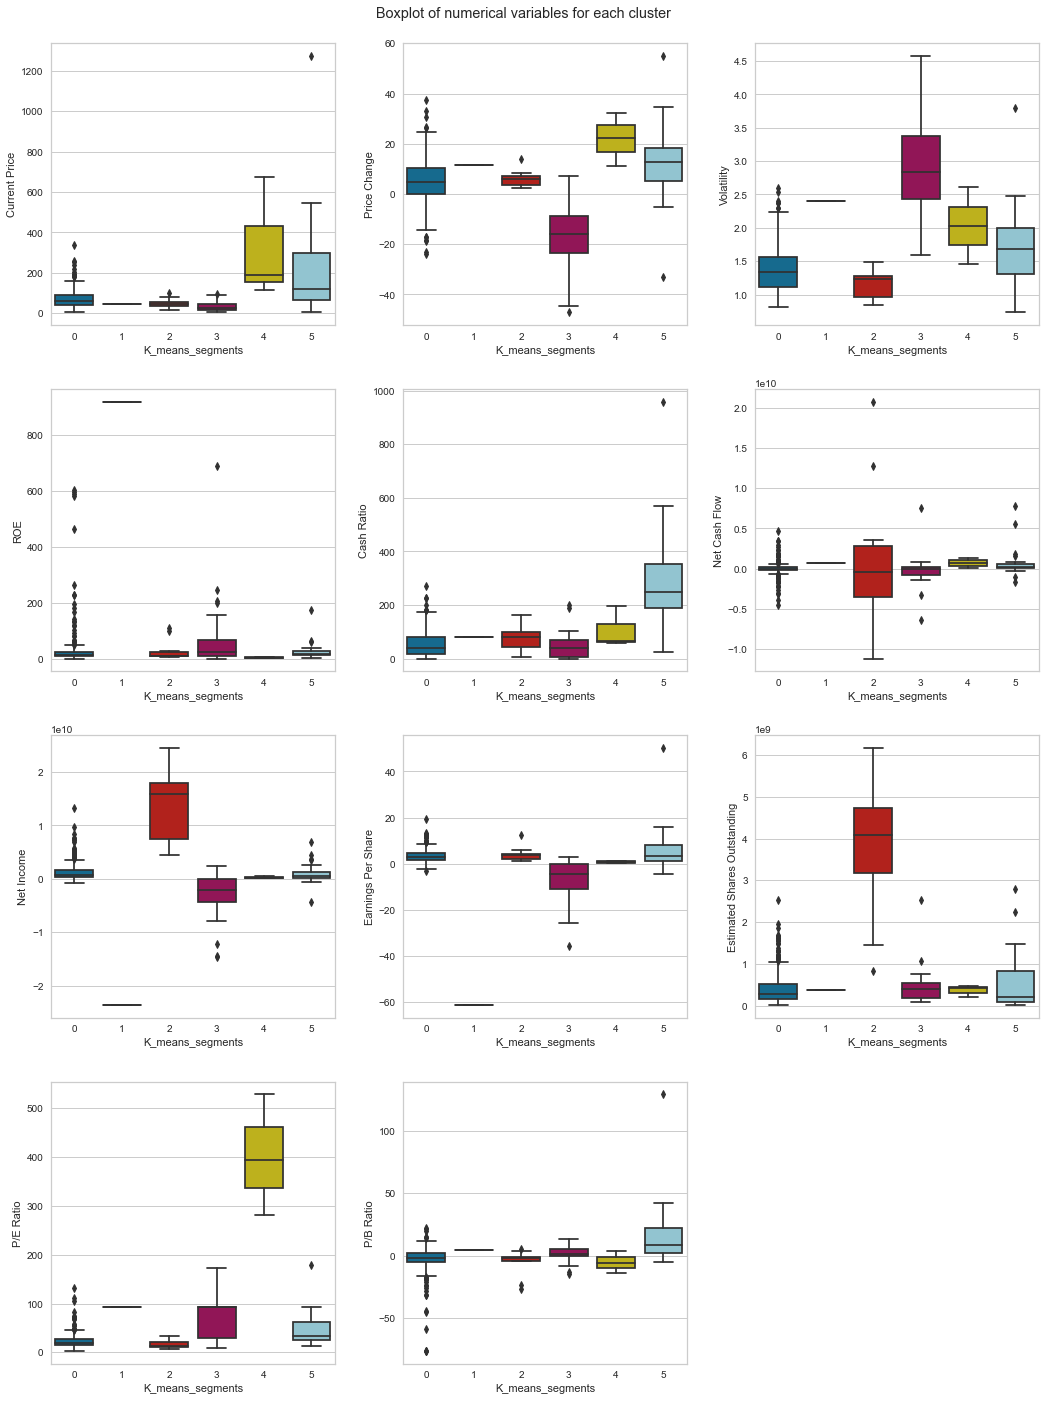

In [ ]:
plt.figure(figsize=(15, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(numeric_var):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

<AxesSubplot:xlabel='K_means_segments'>

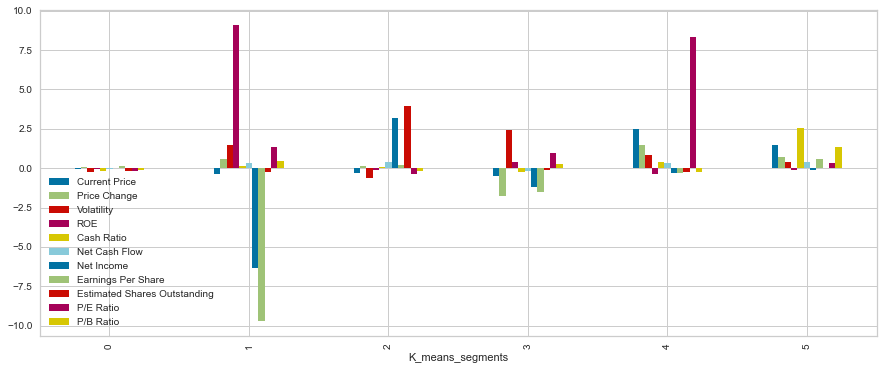

In [ ]:
df_scaled.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

* Cluster 1 has companies with high ROE, with the lowest price changes and the lowes current price. This cluster has th outliers.
* Cluster 0 es made up of low values for all features. 
* Cluster 5 is made up by positive values for almost all clusters and small negative values for 2 features.

In [ ]:
## Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

from scipy.spatial.distance import pdist 

In [ ]:
## CHECKING COPHENIC CORRELATION

# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df_scaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9345789156242958.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7660552973069212.
Cophenetic correlation for Euclidean distance and average linkage is 0.9456625849398145.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.915030499194923.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9248724361899451.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8320028943789776.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9399690636636666.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9131524216256295.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9349216431068483.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.8258851171510331.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.934660329940363.
Cophenetic corr

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9456625849398145, which is obtained with Euclidean distance and average linkage.


In [ ]:
# Ward and centroid methods can all be run with Euclidean distance.

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df_scaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df_scaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9345789156242958.
Cophenetic correlation for complete linkage is 0.7660552973069212.
Cophenetic correlation for average linkage is 0.9456625849398145.
Cophenetic correlation for centroid linkage is 0.9399748899125907.
Cophenetic correlation for ward linkage is 0.7777084742313107.
Cophenetic correlation for weighted linkage is 0.915030499194923.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9456625849398145, which is obtained with average linkage.


#### DENDOGRAM

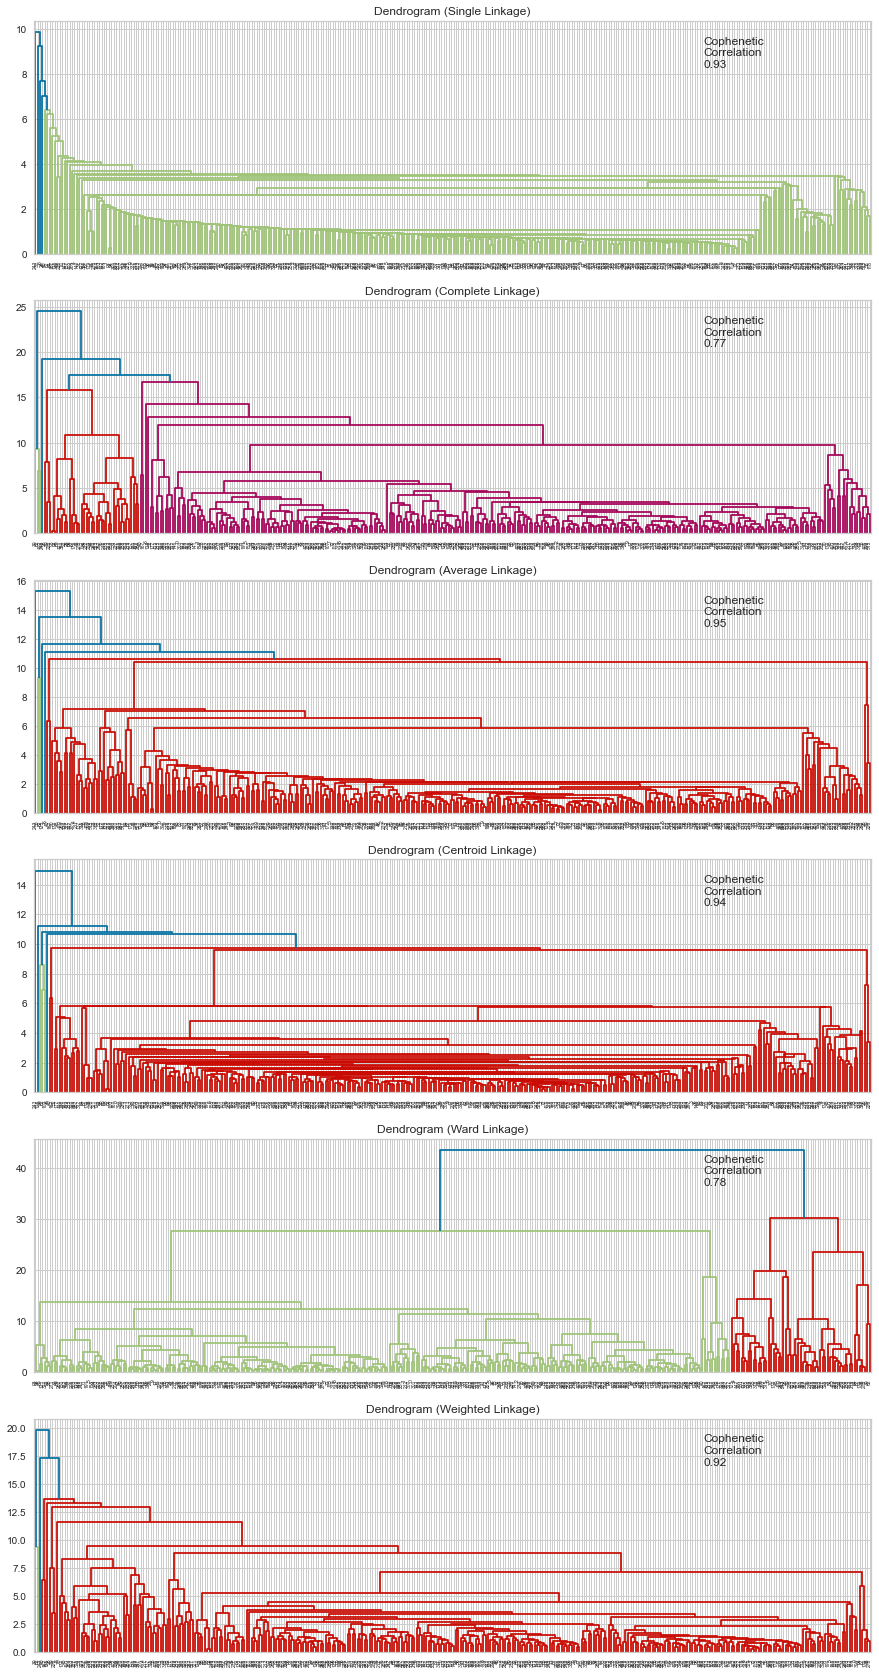

In [ ]:
# list of linkage methods

distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]


# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

* Dendograms become hard to read and determine the right cluster number as observations increase. 

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=6)

In [ ]:
df_scaled["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

#### Cluster Profiling

In [ ]:
cluster_profile_HC = df_scaled.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile_HC["count_in_each_segment"] = (
    df_scaled.groupby("HC_Clusters")["Cash Ratio"].count().values
)

In [ ]:
# let's see the names of economic sectors in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["GICS Sector"].nunique(),
        "Economic Sectors in the cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["GICS Sector"].unique())
    print("-" * 100, "\n")

The 11 Economic Sectors in the cluster 0 are:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Energy' 'Telecommunications Services']
---------------------------------------------------------------------------------------------------- 

The 1 Economic Sectors in the cluster 4 are:
['Information Technology']
---------------------------------------------------------------------------------------------------- 

The 1 Economic Sectors in the cluster 2 are:
['Energy']
---------------------------------------------------------------------------------------------------- 

The 2 Economic Sectors in the cluster 5 are:
['Financials' 'Information Technology']
---------------------------------------------------------------------------------------------------- 

The 1 Economic Sectors in the cluster 3 are:
['Information Technology']
------------------------------------------------------------------

* Cluster 5, 2, 3 and 4 have only 1 economic sector.
* Cluster 5 and 3 have only companies related to 'Information Technology'.
* Cluster 0 has the thick of all observations.

In [ ]:
# let's see the names of the sub industres in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["GICS Sub Industry"].nunique(),
        "Subindustries in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["GICS Sub Industry"].unique())
    print("-" * 100, "\n")

The 104 Subindustries in cluster 0 are:
['Airlines' 'Pharmaceuticals' 'Health Care Equipment'
 'Application Software' 'Semiconductors' 'Agricultural Products'
 'MultiUtilities' 'Electric Utilities' 'Life & Health Insurance'
 'Property & Casualty Insurance' 'REITs' 'Multi-line Insurance'
 'Insurance Brokers' 'Internet Software & Services' 'Specialty Chemicals'
 'Building Products' 'Biotechnology' 'Semiconductor Equipment'
 'Electrical Components & Equipment' 'Asset Management & Custody Banks'
 'Specialized REITs' 'Internet & Direct Marketing Retail'
 'Specialty Stores' 'Managed Health Care'
 'Oil & Gas Exploration & Production' 'Electronic Components'
 'Aerospace & Defense' 'Home Entertainment Software' 'Residential REITs'
 'Water Utilities' 'Consumer Finance' 'Banks'
 'Oil & Gas Equipment & Services' 'Metal & Glass Containers'
 'Health Care Distributors' 'Auto Parts & Equipment'
 'Construction & Farm Machinery & Heavy Trucks' 'Real Estate Services'
 'Hotels, Resorts & Cruise Lines' 'Fe

In [ ]:
# lets display cluster profile
cluster_profile_HC.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,count_in_each_segment
HC_Clusters,,,,,,,,,,,,,
0,-0.036510,0.001796,-0.013386,-0.044196,-0.034585,-0.045657,0.011105,0.016511,-0.019563,-0.003858,-0.032745,0.612613,333
1,12.195670,-0.074042,-0.435986,-0.109922,1.262362,-0.888563,0.268653,7.192572,-0.622886,-0.161672,0.047742,5.000000,1
2,-0.575803,-1.453888,3.311126,7.908297,-0.210698,-0.693613,-5.236157,-6.778822,-0.068025,0.635362,0.235430,2.000000,2
3,0.243055,1.013134,-0.347539,-0.327752,9.834905,0.276029,0.552725,-0.222962,2.632871,1.067680,0.545140,5.000000,1
4,1.998837,0.176091,-0.692132,-0.099549,-0.498664,0.018187,-0.228206,0.932390,-0.603923,-0.035502,9.377562,5.000000,1
5,-0.564007,0.597207,-0.344579,-0.281074,0.669815,8.592722,3.090627,0.078798,2.622293,-0.428216,0.231367,2.000000,2


* Cluster o has the thick of the observations with 333.
* Cluster 3, 4 and 5 have only 1 observation.
* Cluster 1 and 2 have only 2 observations.

* Cluster 1 has the highest Net Cash Flow and Net Income mean.
* Cluster 2 has the highest volatility and ROE mean.
* Cluster 3 has the highest Price Change, Cash Ratio, Estimated Shares Outstanding and P/E Ratio mean.
* Cluster 4 has the highest Current Price and Earnings Per Share mean.
* Cluster 5 has the highest P/B ratio mean.

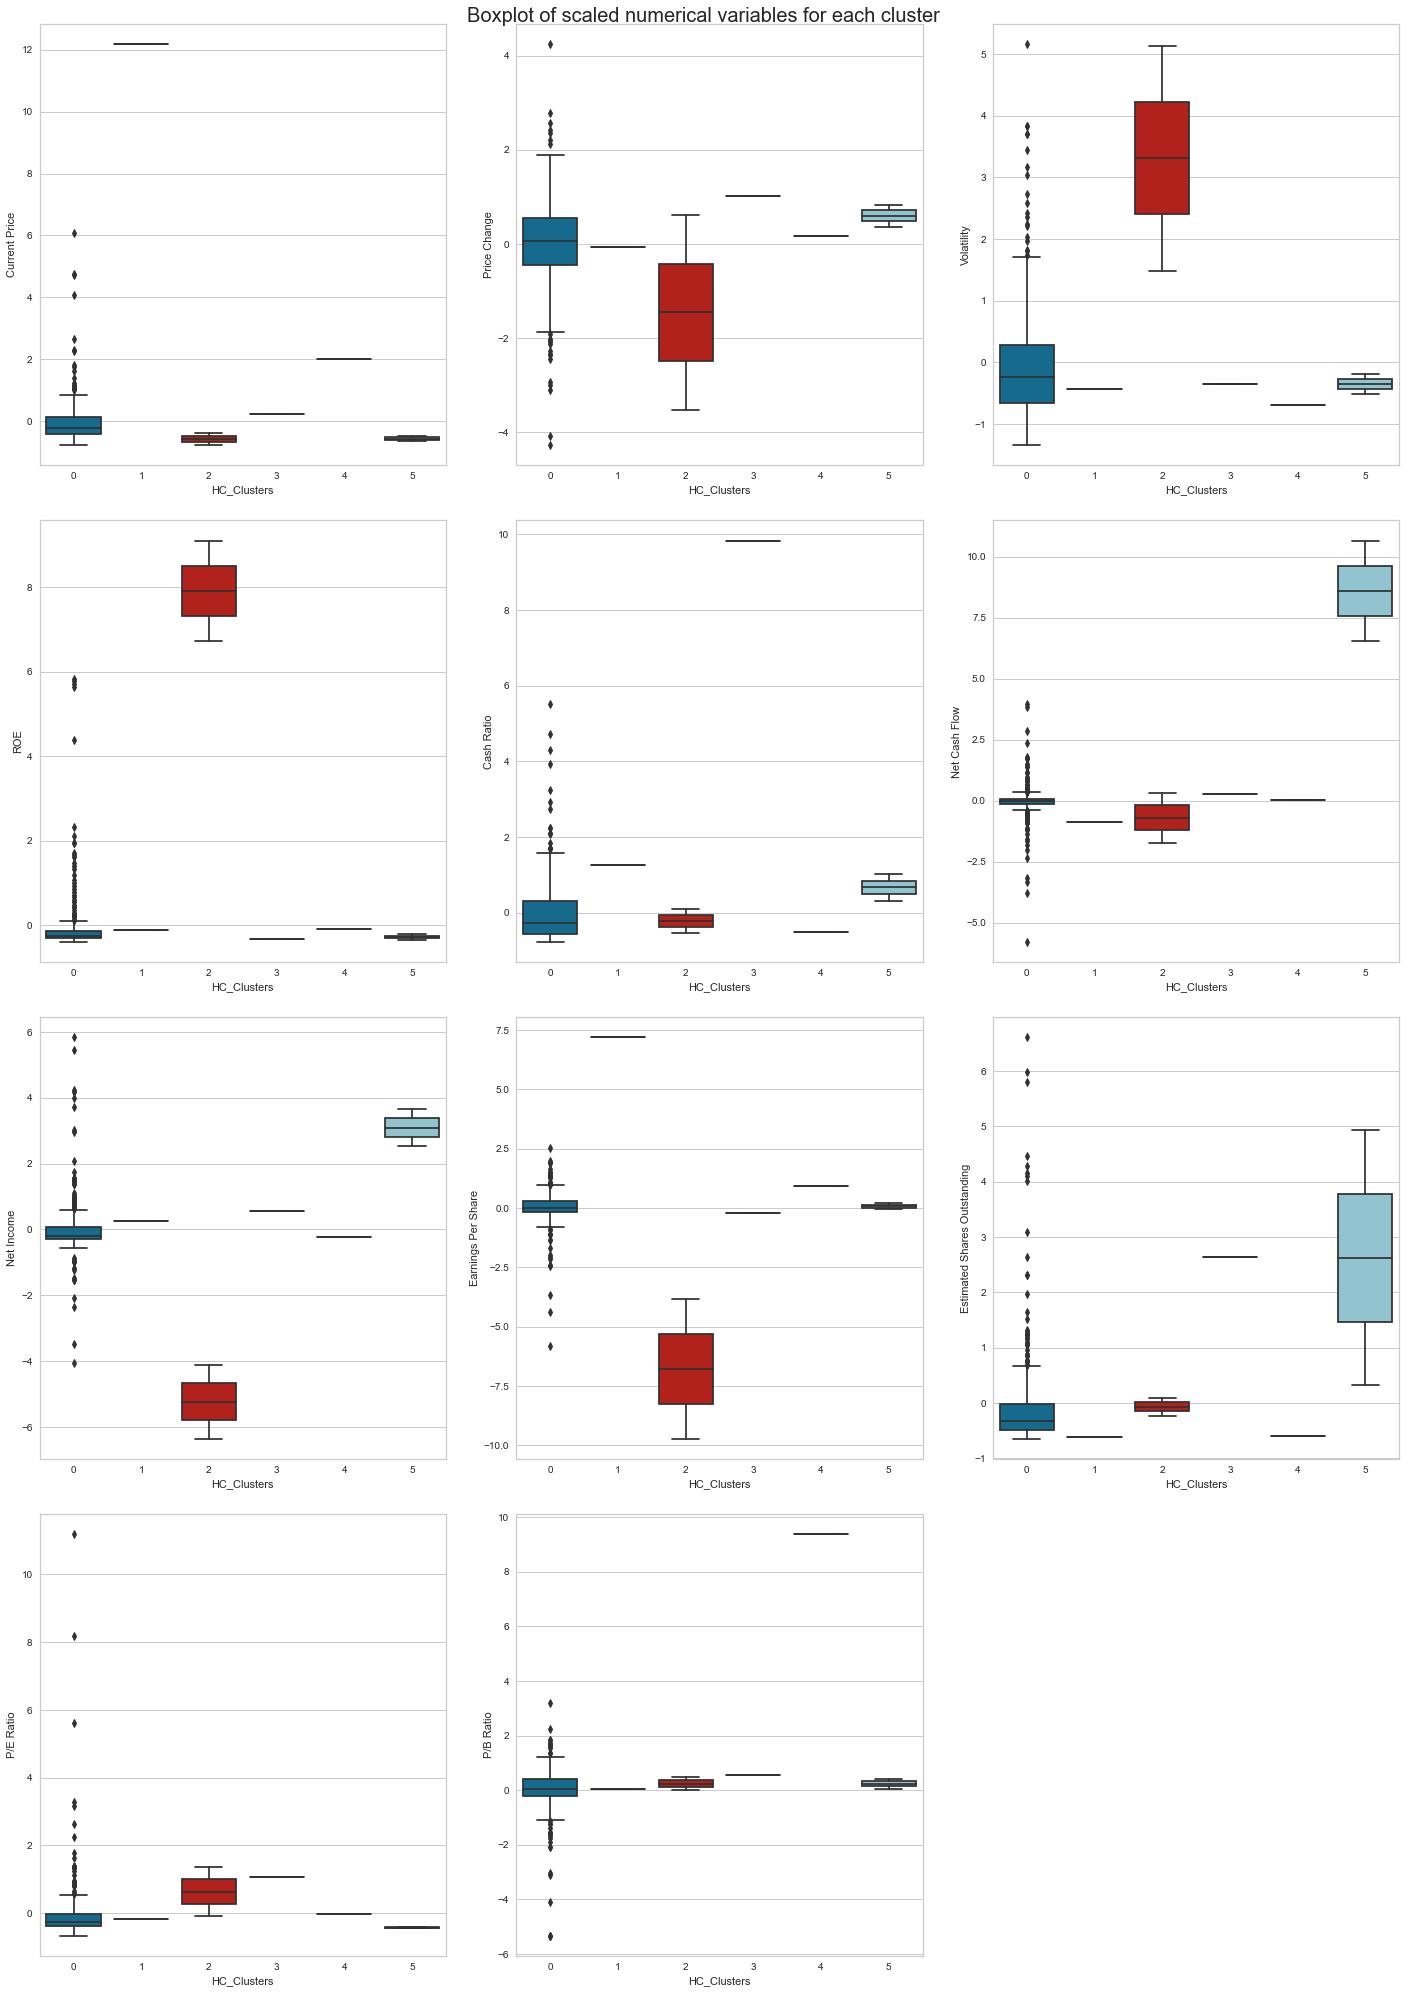

In [ ]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(numeric_var):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df_scaled, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

<AxesSubplot:xlabel='HC_Clusters'>

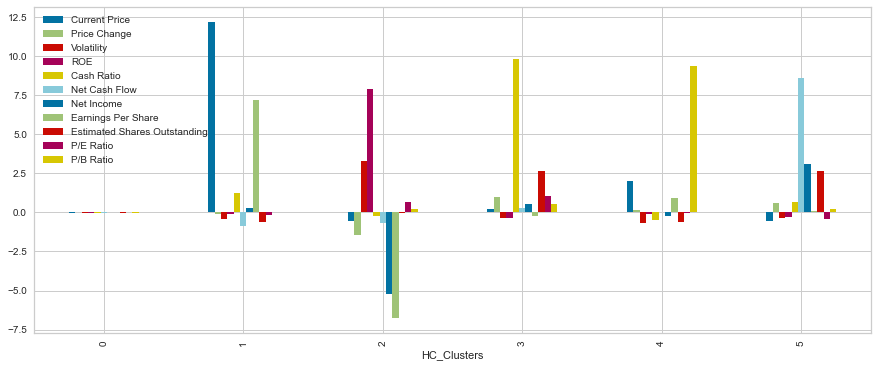

In [ ]:
df_scaled.drop(['K_means_segments'], axis = 1,inplace=True)
df_scaled.groupby("HC_Clusters").mean().plot.bar(figsize=(15, 6))

In [ ]:
* Cluster 0 is the thickest one with low values in all features.
* As with Kmeans there is a cluster that invovles high Current Price and Price Change.
* Cluster 2 has the a combination of the lowest Earnings PEr Share, Current Price###########

SyntaxError: invalid syntax (998253575.py, line 1)

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?

Both clustering techniques 
- Which clustering technique gave you more distinct clusters, or are they the same?
K mean gave better clustering results.
As with HC, cluster 0 had the thick of the observations but the other clusters were also representative.

HC clustering took only 1 observation and made it a cluster. It repeated this for 3 clusters and 98% of the observations belonged to cluster 0.

- How many observations are there in the similar clusters of both algorithms?
For both algorithms cluster 0 had the thick of the observations. For k-means 80% of the observations belong to cluster 0 and in HC 98% of the observations belonged to cluster 0.

For k-means 0.29% of the observations belong to cluster 1, 3.82% to cluster 2, 7.65% to cluster 3, 0.88% to cluster 4 and 6.47% to cluster 5.

For HC cluster 1 has 0.59%, 2 has 0.59%, 3 has 0.29%, 4 has 0.29%, 5 has 0.29%.

- How many clusters are obtained as the appropriate number of clusters from both algorithms?

It is hard to determine what is the optimal number of clusters in HC since there are way too many steps and hierarchies in a dendrogram.

For K means a combination of graphing, sihulete and variation was key to determine that 6 would be a good number of clusters. 

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.


* Since K-Means algorithm is about finding mean of clusters, the algorithm is influenced by outlier


## Actionable Insights and Recommendations

- This clustering helps on identifying the stocks with the most risk related to variation in prices, P/E, cash flows etc.
- There is a strong correlation between risk and interest, therefore identifying the stocks with the most risk and the lowest risk will help creating an interesting portfolio. 
- There are risk adverse buyers that can buy stock from the thick of cluster 0.